In [110]:
resultDict = {'SymbolicGPT':[],
              'LSTM-RL':[]}

In [111]:
# load the first model info
import csv
with open('./Experiments/results_dsr/results_one_var.csv', encoding='utf') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    for idx, line in enumerate(data):
        if idx == 0 or len(line)==0:
            continue # ignore the first line
        resultDict['LSTM-RL'].append(eval(line[-1]))

In [112]:
# load the second one
fileName = 'XYE_1Var_30Points_SymbolicGPT_GPT_PT_Summation_Padding_100_MINIMIZE'
with open('./Experiments/{}.txt'.format(fileName), encoding='utf') as h:
    lines = h.readlines()
    counter = 0
    for idx, line in enumerate(lines):
        #print(counter, line)
        if counter == 5:
            counter = -2
            #print(line)
            resultDict['SymbolicGPT'].append(eval(line))
        counter += 1

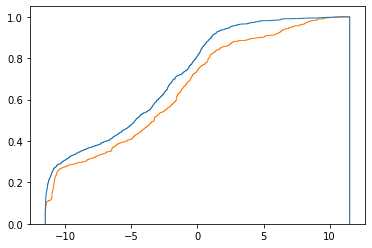

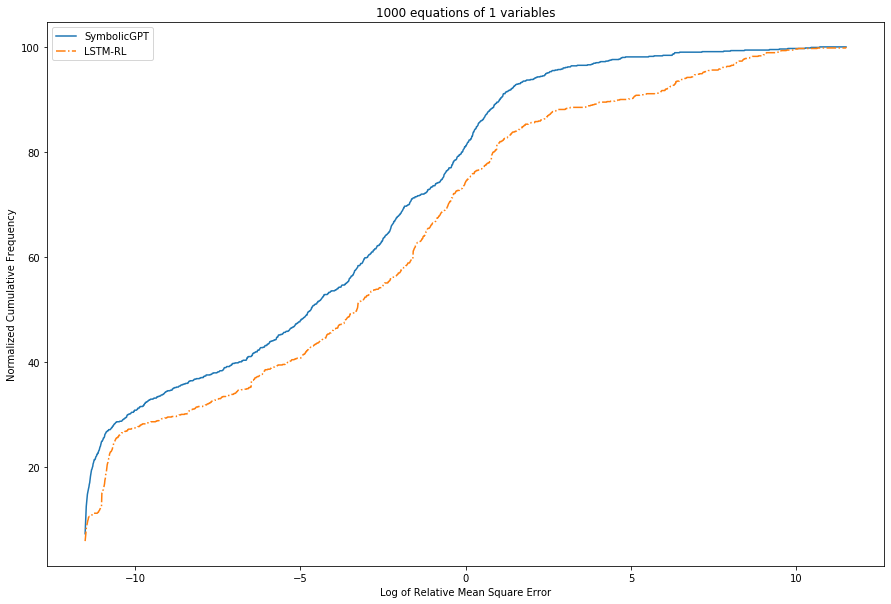

In [113]:
# plot the error frequency for model comparison
from matplotlib import pyplot as plt
import numpy as np
fName = './Experiments/' + fileName + '_BASELINE'
num_eqns = len(resultDict['SymbolicGPT'])
num_vars = 1

models = list(key for key in resultDict.keys() if len(resultDict[key])==num_eqns)
lists_of_error_scores = [resultDict[key] for key in models if len(resultDict[key])==num_eqns]
linestyles = ["-","dashdot","dotted","--"]

eps = 0.00001
y, x, _ = plt.hist([np.log([max(min(x+eps, 1e5),1e-5) for x in e]) for e in lists_of_error_scores],
                   label=models,
                   cumulative=True, 
                   histtype="step", 
                   bins=2000, 
                   density=True,
                   log=False)
plt.figure(figsize=(15, 10))

for idx, m in enumerate(models): 
    plt.plot(x[:-1], 
           y[idx] * 100, 
           linestyle=linestyles[idx], 
           label=m)

plt.legend(loc="upper left")
plt.title("{} equations of {} variables".format(num_eqns, num_vars))
plt.xlabel("Log of Relative Mean Square Error")
plt.ylabel("Normalized Cumulative Frequency")

name = '{}.png'.format(fName)
plt.savefig(name)